## Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

##### Importing the libraries

In [1]:
#import the warnings 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Data Cleaning :

##### Read the dataset 

In [3]:
df = pd.read_csv(r'C:\Users\Srilathaa Vasu\Jupyter Notebooks\IIIT-B\Assignments\Lead Scoring Case Study\Leads.csv')

In [4]:
#Print the head of the data frame.
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Checking for duplicates

In [8]:
# To check for duplicates
df.loc[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicates in the data.

##### Fixing the rows and columns

We can drop 'Prospect ID' as it is not required for the analysis.

In [9]:
# Dropping Prospect ID column
df.drop('Prospect ID', axis = 1, inplace = True)

In [10]:
# There are some columns with value 'Select' like Specialization, How did you hear about X Education, Lead Profile, and City. 
# It is equivalent to Null as it does not holds any meaning for these columns.
# So replacing 'Select' with NaN.

df[['Specialization','How did you hear about X Education', 'Lead Profile','City']] = df[['Specialization','How did you hear about X Education', 'Lead Profile','City']].replace('Select', np.nan)

In [11]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Checking for null values in the dataset

In [12]:
null_per = round(100*(df.isnull().sum()/len(df.index)), 2)
print(null_per)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

We'll drop columns with more than 70% of missing values as it does not make sense to impute these many values.

In [13]:
# To drop columns with more than 70% of missing values as it does not make sense to impute these many values
df = df.drop(df.loc[:,list(null_per>70)].columns, 1)

* For categorical variables, we'll analyse the count/percentage plots.
* For numerical variables, we'll describe the variable and analyse the box plots.

In [14]:
## Finding the null percentage for all the columns of the new dataframe:
# After dropping missing value columns
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Following columns have null values :

- Country
- Lead Quality
- Lead Source
- Total Visits
- Page Views Per Visit
- Last Activity    
- Specialization
- What is your current occupation
- What matters most to you in choosing a course
- City                                             
- Asymmetrique Activity Index                      
- Asymmetrique Profile Index                       
- Asymmetrique Activity Score                      
- Asymmetrique Profile Score     

Let us see and decide whether we need to impute values in the above columns or drop the columns.

##### Lead Quality

In [15]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [16]:
df['Lead Quality'].mode()

0    Might be
Name: Lead Quality, dtype: object

According to the data dictionary, 'Lead Quality' is defined as the quality of lead based on the data and intuition the employee who has been assigned to the lead.

In [17]:
# Thus we can replace null values with 'Might be' as we do not want to lose any potential customers.
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Might  be')

In [18]:
df['Lead Quality'].isnull().sum()

0

##### Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score

According to the data dictionary, 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score' are defined as an index and score assigned to each customer based on their activity and their profile.


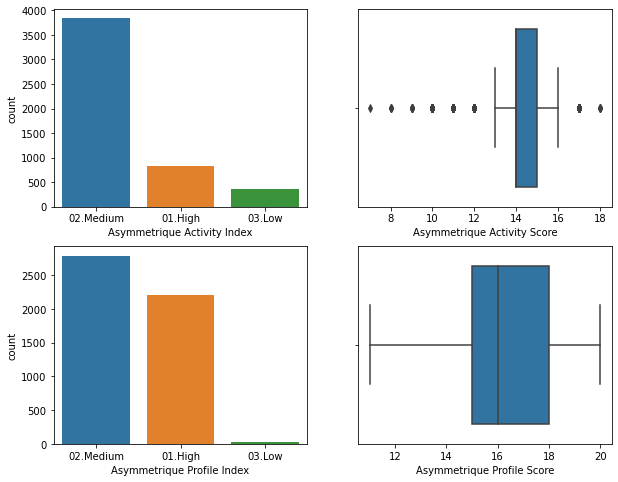

In [19]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
plt_list = ['Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 8))
for var in plt_list:
    plt.subplot(2,2,plt_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(df[var])
    else:
        sns.boxplot(df[var])
plt.show()

From the plots, we can see that there is a lot of variation in them. So, it's not a good idea to impute the missing 45% of the data. These values will not have any significant importance in the model. So, we can drop these variables.

In [20]:
df = df.drop(plt_list,1)

In [21]:
#Rechecking null values 
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

##### City

In [22]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

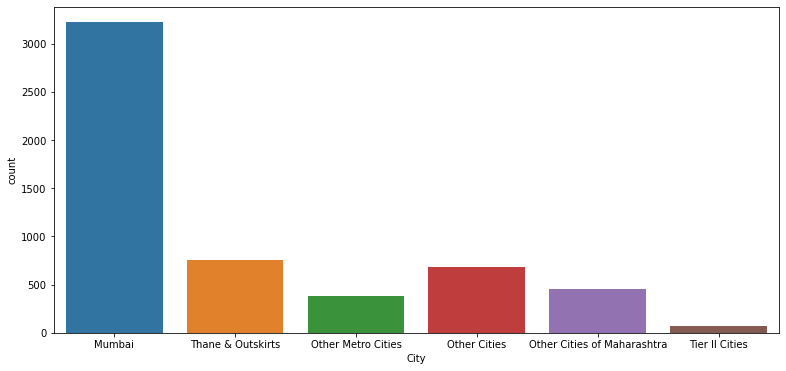

In [23]:
plt.figure(figsize=[13,6])
sns.countplot(df['City'])

In [24]:
# Around 60% of the total data is city 'Mumbai'. So we will impute Mumbai for NaN values.
df['City'] = df['City'].replace(np.nan, 'Mumbai')

##### Specialization

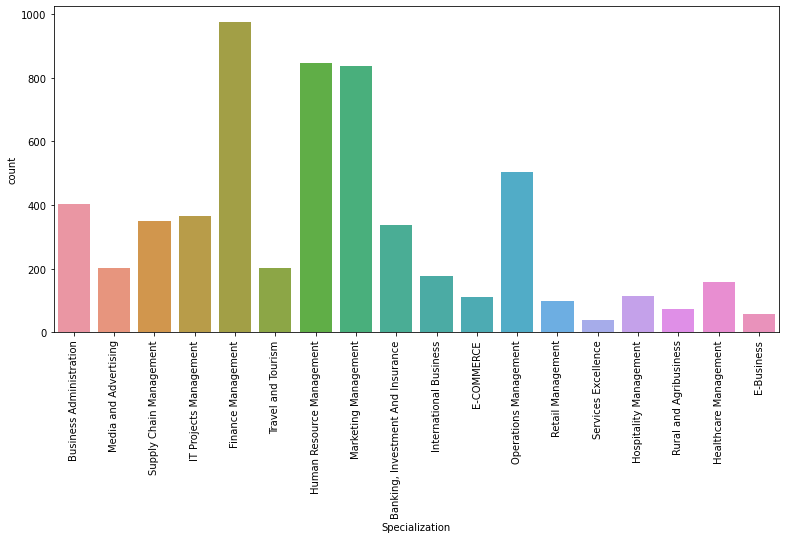

In [25]:
plt.figure(figsize=[13,6])
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)
plt.show()

From the plot, we can observe that 'Finance Management' has the highest frequency. There are a lot of different specializations and it's not accurate to directly impute with the mean. It is possible that the person does not have a specialization or his/her specialization is not in the options. We can create a new column 'Options' for that.

In [26]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

##### Tags, What matters most to you in choosing a course, What is your current occupation and Country

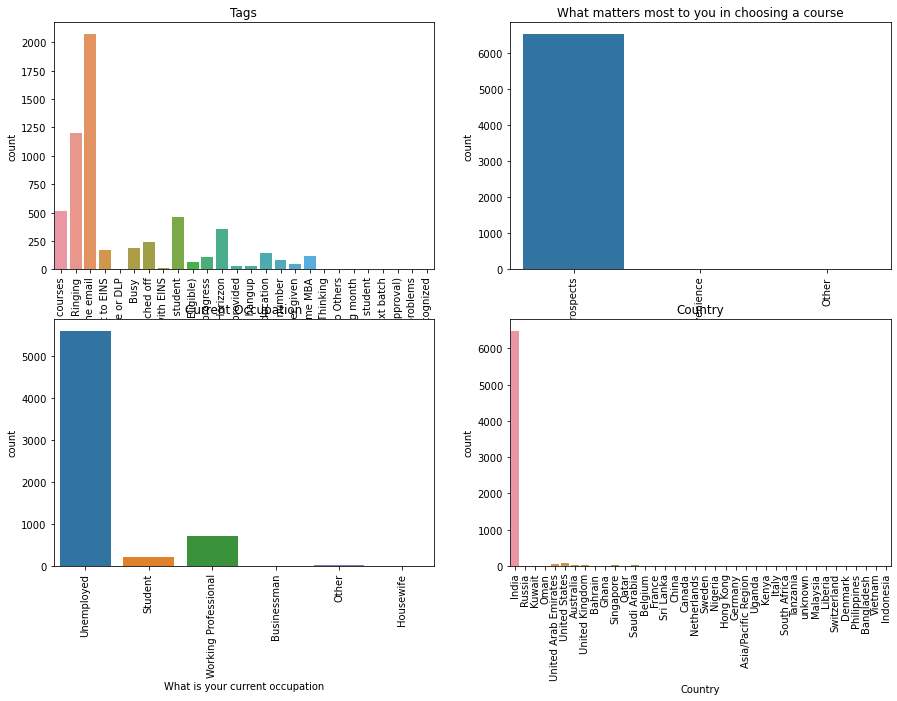

In [27]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(df['Tags']).tick_params(axis='x', rotation = 90)
plt.title('Tags')
plt.subplot(2,2,2)
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,3)
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,4)
sns.countplot(df['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

From the above plots, we can observe that one value is clearly more frequent than all others. So it makes sense to impute with the most frequent values.

In [28]:
# To impute with the most frequent value
plt_list =['Tags', 'What matters most to you in choosing a course', 'What is your current occupation','Country']
for var in plt_list:
    top_frequent = df[var].describe()['top']
    df[var] = df[var].replace(np.nan, top_frequent)

In [29]:
#Rechecking null values 
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

##### ''TotalVisits' and 'Page Views Per Visit'

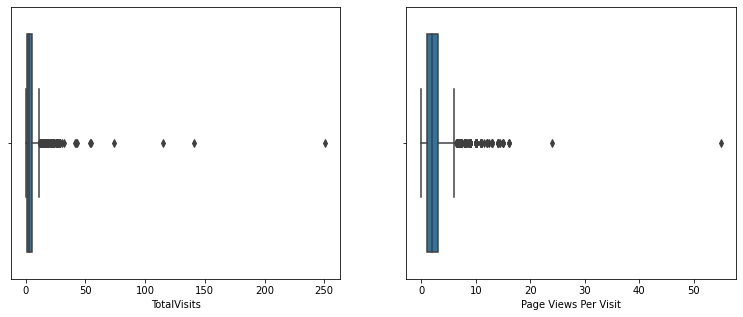

In [30]:
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(13, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(df[var])
plt.show()

We shall impute the null values in 'TotalVisits' and 'Page Views Per Visit' by calculating the median values.

In [31]:
print(df['TotalVisits'].median())
print(df['Page Views Per Visit'].median())

3.0
2.0


In [32]:
df['TotalVisits'] = df['TotalVisits'].replace(np.nan, df['TotalVisits'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, df['Page Views Per Visit'].median())

##### Lead Source

In [33]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [34]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [35]:
# let us club similar categories to avoid confusion
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
# Let us Combine Sources that have less value counts to simplify our analysis.
less_count = ['bing','Click2call','Live Chat','Press_Release','welearnblog_Home','blog','testone','NC_EDM','youtubechannel','Pay per Click Ads','WeLearn']
df['Lead Source'] = df['Lead Source'].replace(less_count,'Others')

In [36]:
# imputation for 'Lead source' column
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')

##### Lead Quality

In [37]:
df['Lead Quality'].value_counts()

Might  be            4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [38]:
# let us club similar categories to avoid confusion
df['Lead Quality'] = df['Lead Quality'].replace('Might  be','Might be')

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

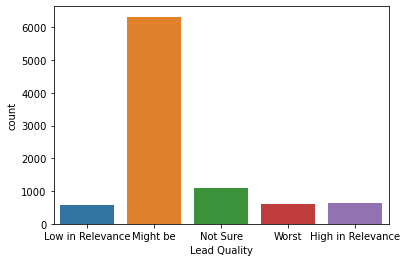

In [39]:
sns.countplot(df['Lead Quality'])

##### Last Activity

In [40]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [41]:
# Let us categorize all the last activities that have very few counts into one category as `Others`
# Since their count is very low, clubbing them together in one category would be more helpful in analysis
combine =['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow','Unreachable','Unsubscribed']
df['Last Activity'] = df['Last Activity'].replace(combine,'others')
df['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [42]:
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')

In [43]:
#Rechecking null values 
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

There are no missing values in our dataframe.

In [44]:
unique_list = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

for var in unique_list:
    print(var,':',df[var].unique())

Magazine : ['No']
Receive More Updates About Our Courses : ['No']
Update me on Supply Chain Content : ['No']
Get updates on DM Content : ['No']
I agree to pay the amount through cheque : ['No']


Since the above columns have only one value "No" in all the rows, we can eliminate these columns.

In [45]:
df = df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

##### Last Notable Activity

In [46]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [47]:
# Let us combine together all those categories whose have very few last notable ativity count

low_count = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website',
'Resubscribed to emails','Approached upfront','Email Received','View in browser link Clicked']
df['Last Notable Activity'] = df['Last Notable Activity'].replace(low_count,'Others')

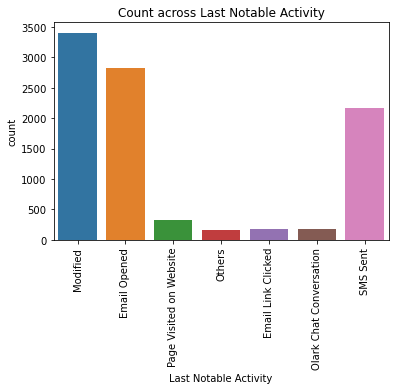

In [48]:
sns.countplot(df['Last Notable Activity'])
plt.title('Count across Last Notable Activity')
plt.xticks(rotation = 90)
plt.show()

### Handling Outliers

In [49]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


We can observe that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

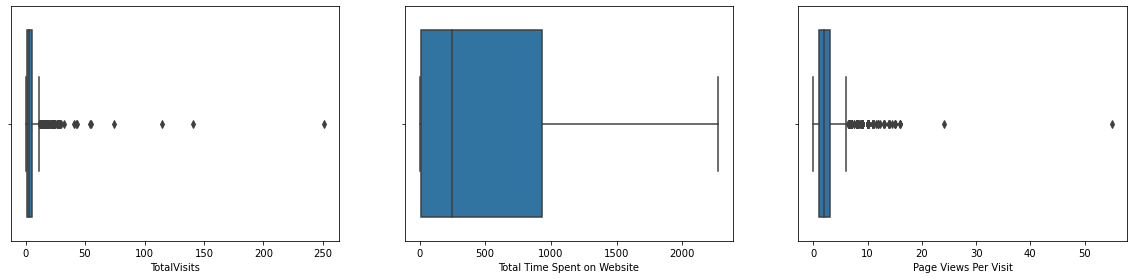

In [50]:
# Check the outliers in all the numeric columns
# Boxplots
num_var_list = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(20, 25))
for var in num_var_list:
    plt.subplot(5,3,num_var_list.index(var)+1)
    sns.boxplot(df[var])
plt.show()

From the boxplots, we can see that there are outliers present in the variables.

* For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
* There are no significant outliers in 'Total Time Spent on Website'
* For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

In [51]:
# Outlier treatment
percentile = df['TotalVisits'].quantile([0.95]).values
df['TotalVisits'][df['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df['Page Views Per Visit'].quantile([0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentile[0]] = percentile[0]

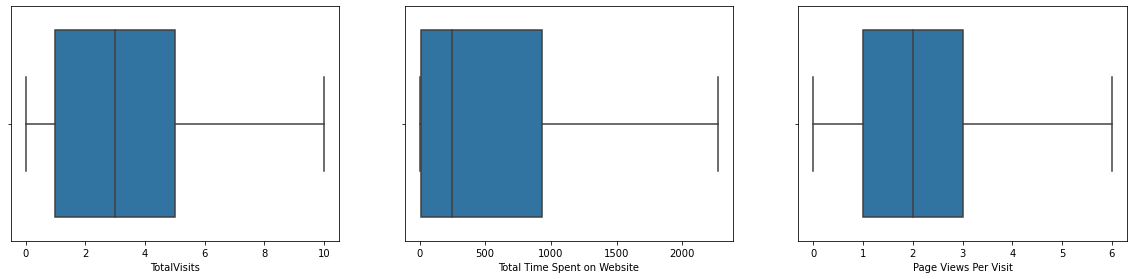

In [52]:
# Boxplots
num_var_list = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(20, 25))
for var in num_var_list:
    plt.subplot(5,3,num_var_list.index(var)+1)
    sns.boxplot(df[var])
plt.show()

### Data Analysis:

In [53]:
def plot_fun(plt_list):  
    plt.figure(figsize=(13, 5))
    for var in plt_list:
        plt.subplot(1,2,plt_list.index(var)+1)
        sns.countplot(x=var, hue='Converted', data= df).tick_params(axis='x', rotation = 90)
        plt.title(var)
    plt.show()

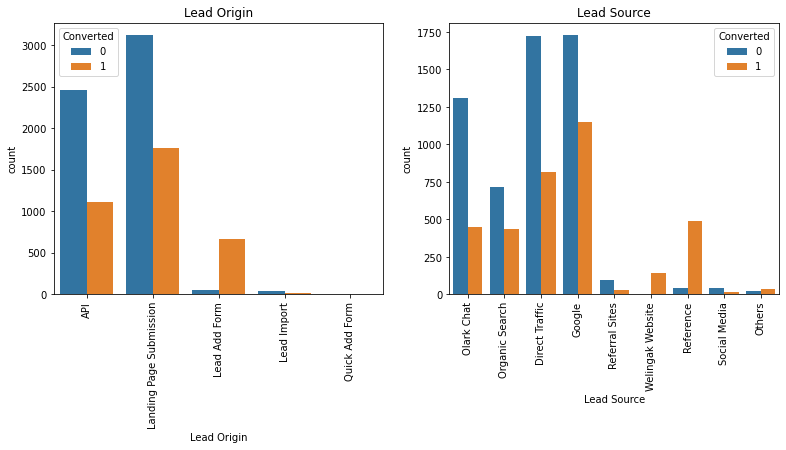

In [54]:
plot_fun(['Lead Origin','Lead Source'])

##### Lead Origin:

1. Customers who were identified as Lead from Landing Page submission, constitute the majority of the leads.
2. Customers originating from Lead Add Form have high probability of conversion.
3. Lead origin-API & Lead Import have the least conversion rate. Customers from Lead Import are very few in number.

##### Lead Source:
1. Majority source of the lead is from Google, followed by Direct Traffic. 
2. Lead source from Google has highest probabilty of conversion. 
3. Leads with source Reference has maximum probabilty of conversion.

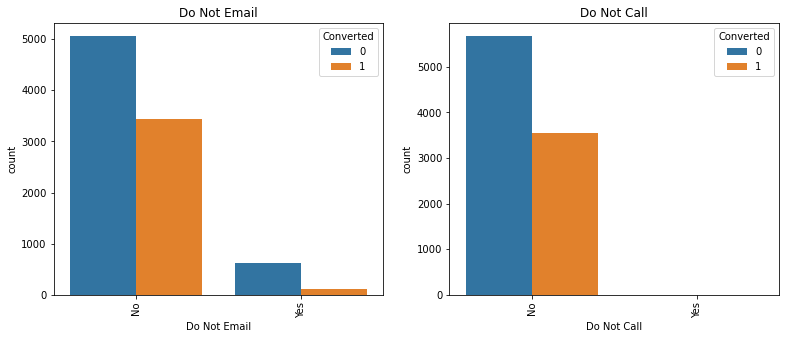

In [55]:
plot_fun(['Do Not Email','Do Not Call'])

##### Do Not Email

1. Customers who opt for 'Do Not Mail' have lower conversion rate.
2. Customers who do not opt for 'Do Not Mail' have higher conversion rate.

##### Do Not Call
Customers who do not opt for Do Not call have Higher conversion rate which is around 38%.These constitute the majority of the leads.

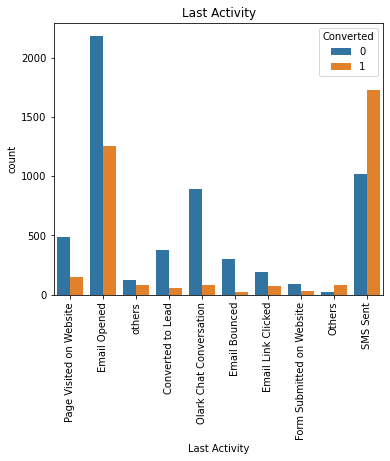

In [56]:
plot_fun(['Last Activity'])

##### Last Activity:

1. Customers who last activity was SMS Sent have higher conversion rate. 
2. Customers who last activity was Email Opened constitute majority of the customers.

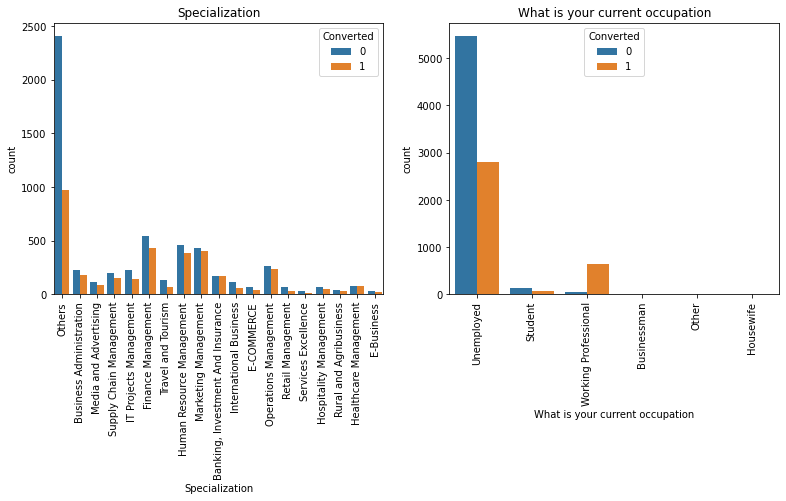

In [57]:
plot_fun(['Specialization','What is your current occupation'])

##### Specialisation:
1. Maximum Leads have specialisation as Management & Others. 
2. Leads with specialisation as Rural & Agribusiness have least probabilty of conversion.

##### What is your current occupation:
1. Maximum Leads have occupation as Unemployed.
2. Very few leads are Housewives.

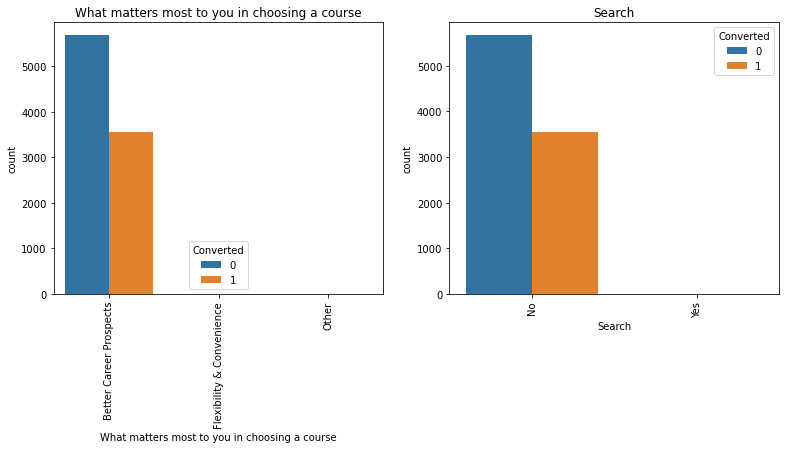

In [58]:
plot_fun(['What matters most to you in choosing a course','Search'])

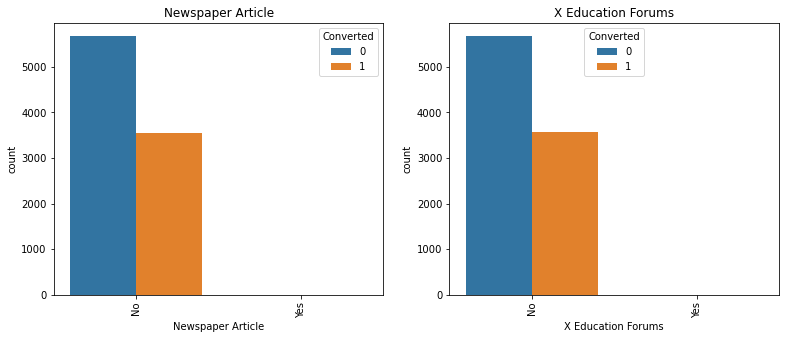

In [59]:
plot_fun(['Newspaper Article','X Education Forums'])

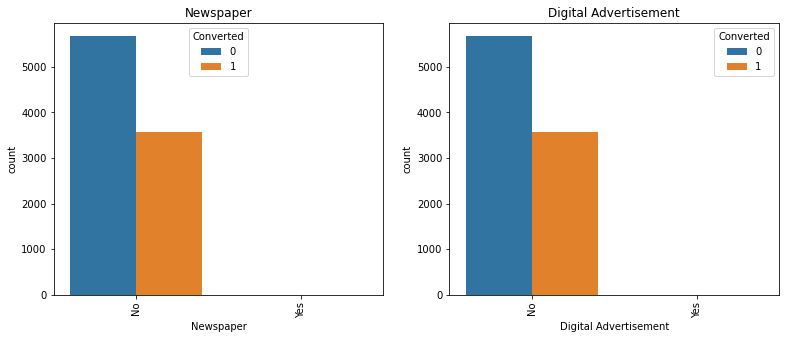

In [60]:
plot_fun(['Newspaper','Digital Advertisement'])

##### What matters most to you in choosing a career:
Number of Leads to whom better career aspects matters most in choosing a career are more & have higher probabilty of conversion.

##### Search:
Customers who do not opt for Do Not call have Higher conversion rate which is around 38%.These constitute the majority of the leads.

##### Search, Newspaper Article,X Education Forums, Newspaper & Digital Advertisement:
Customers who have seen the add of the education company in any form, are very few in number. 

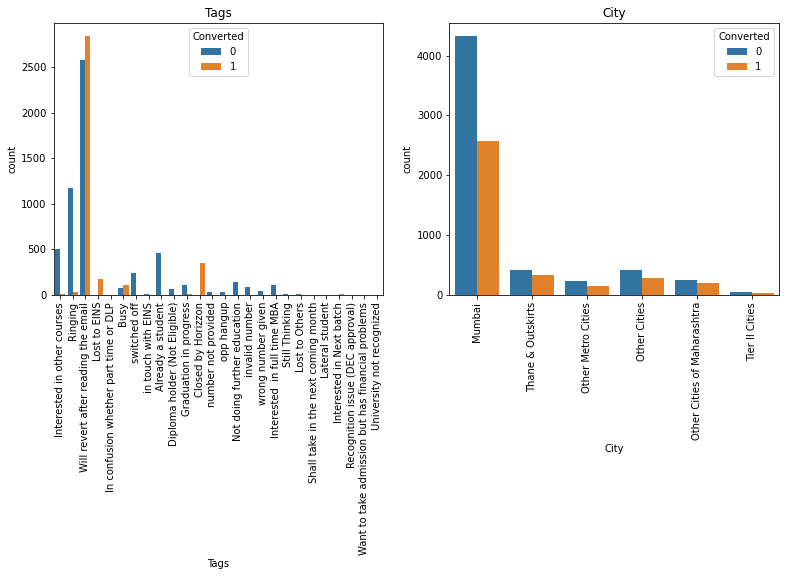

In [61]:
plot_fun(['Tags','City'])

##### Tags:
More focus shall be given on the leads who will revert after reading the mail & others as these are potential leads and have higher rate of conversion.

##### City:
Majority of the leads are from Mumbai city. Customers from mumbai city should be targeted more as these are the potential leads.

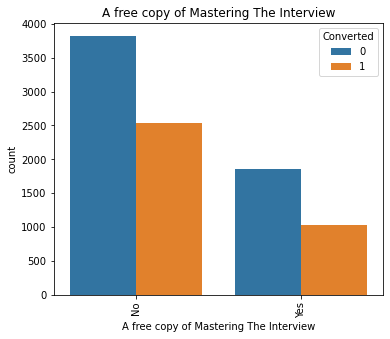

In [62]:
plot_fun(['A free copy of Mastering The Interview'])

#####  A free copy of Mastering The Interview
Customers who ask for afree copy of mastering the interview are less in number but the conversion probabilty for both type of customers is similar.

In [63]:
#We can observe that there is data imbalance in some columns. These will give biased results. Hence it is better to drop them.
drop_data = ['Do Not Call','Country','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement', 
             'Through Recommendations','What matters most to you in choosing a course']
df = df.drop(drop_data, axis = 1)

In [64]:
df.shape

(9240, 16)

#### Bivariate Analysis - Visualizing Numerical Columns with Target Column

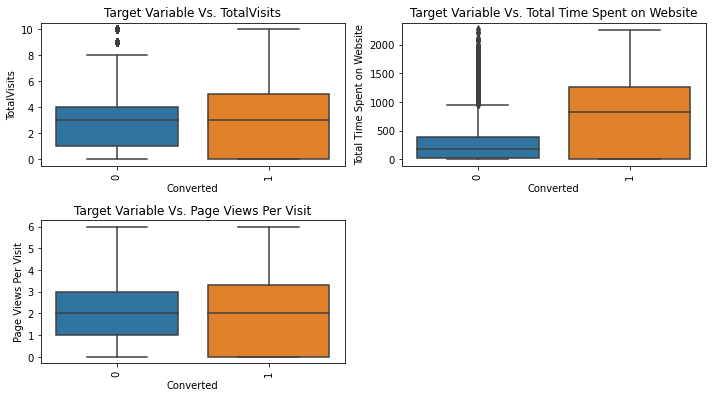

In [65]:
def boxplot(y,fig):
    plt.subplot(3,2,fig)
    sns.boxplot(x = 'Converted', y = y, data = df)
    plt.title('Target Variable Vs.'+' '+ y)
    plt.xlabel('Converted')
    plt.ylabel(y)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         

boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

##### Total Visits & Page Views Per Visit:
Median for both types of Leads : converted and non converted are similar.

##### Total Time Spent on website
Leads who spend more time on the X education website, have more chances of converting.

### Data Preparation:

#### Converting some binary variables (Yes/No) to 1/0

In [66]:
# List of variables to map

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [67]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Might be,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,others,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,0,Modified


#### Creating dummy variables for all categorical variables

In [68]:
dummy_col = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Tags', 'City', 'Lead Quality',
                       'What is your current occupation', 'Last Notable Activity']

In [69]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(df[dummy_col], drop_first=True)

# To add result to the original dataframe
df_final = pd.concat([df, dummy], axis=1)

# To drop the original variables
df_final = df_final.drop(dummy_col,1)

In [70]:
df_final.shape

(9240, 91)

In [71]:
df_final.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [72]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 91 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Lead Number                                             9240 non-null   int64  
 1   Do Not Email                                            9240 non-null   int64  
 2   Converted                                               9240 non-null   int64  
 3   TotalVisits                                             9240 non-null   float64
 4   Total Time Spent on Website                             9240 non-null   int64  
 5   Page Views Per Visit                                    9240 non-null   float64
 6   A free copy of Mastering The Interview                  9240 non-null   int64  
 7   Lead Origin_Landing Page Submission                     9240 non-null   uint8  
 8   Lead Origin_Lead Add Form             

### Model Building 

#### Splitting the data into training and testing data

In [73]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [74]:
# To put feature variable to X
X = df_final.drop(['Converted'],axis=1)
X.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,660727,0,2.0,1532,2.0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,660681,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [75]:
# To put response variable to y
y = df_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
# Splitting the dataset into train and test with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(6468, 90)
(2772, 90)


### Feature Scaling

In [78]:
scaler = MinMaxScaler()

# Numerical variables
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

In [79]:
X_train.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,641410,0,0.0,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6795,597687,0,0.4,0.214349,0.221667,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3516,626825,0,0.5,0.046655,0.416667,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8105,587928,0,0.5,0.541373,0.833333,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3934,622366,0,0.0,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [80]:
X_train.describe()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,617186.001546,0.078386,0.317285,0.212974,0.374255,0.311843,0.528139,0.079468,0.005102,0.000155,...,0.001237,0.021027,0.897805,0.077613,0.305349,0.367811,0.018553,0.016543,0.035869,0.237477
std,23372.003514,0.268799,0.275994,0.240566,0.295485,0.463282,0.499246,0.270489,0.071252,0.012434,...,0.035150,0.143484,0.302929,0.267582,0.460591,0.482247,0.134950,0.127561,0.185978,0.425570
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596516.250000,0.000000,0.100000,0.005282,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615720.500000,0.000000,0.300000,0.108275,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637348.750000,0.000000,0.500000,0.407790,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,660728.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
# To check the conversion rate
conversion = (sum(df_final['Converted'])/len(df_final['Converted'].index))*100
conversion

38.53896103896104

We have around 39% conversion rate. This is neither exactly 'balanced' nor heavily imbalanced. 

### Model Building

After the creation of dummy variables, we have a large number of features. It is better to use RFE first for feature elimination.

#### Feature Selection using RFE

In [82]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [83]:
#Reduce number of features to 20 using automated approach
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [84]:
# To check output of RFE
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False,  True,  True, False,  True, False, False, False,  True])

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', False, 3),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 66),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Others', False, 35),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 42),
 ('Lead Source_Welingak Website', False, 12),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link Clicked', False, 19),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 30),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False,

In [86]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Others', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Worst', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [87]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_others',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business

### Assessing the Model with StatsModels

#### Model 1

In [88]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [89]:
import statsmodels.api as sm 
# Adding a constant variable 
X_train_rfe_1 = sm.add_constant(X_train_rfe)

# Running the logistic regression model
lr_1 = sm.GLM(y_train,X_train_rfe_1, family = sm.families.Binomial()).fit()

#Let's see the summary of our logistic regression model
print(lr_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1857.7
Date:                Mon, 12 Sep 2022   Deviance:                       3715.5
Time:                        18:31:24   Pearson chi2:                 1.05e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generic function to calculate VIF of variables
def vifcalculate(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [91]:
vifcalculate(X_train_rfe)

,Features,VIF
0,Lead Number,62.90
16,What is your current occupation_Unemployed,38.77
2,Lead Origin_Landing Page Submission,7.24
19,Last Notable Activity_SMS Sent,6.37
7,Last Activity_SMS Sent,6.19
12,Tags_Will revert after reading the email,5.83
14,Lead Quality_Might be,5.77
8,Specialization_Others,4.84
3,Lead Origin_Lead Add Form,4.77
5,Lead Source_Reference,4.52


Since VIF value is high for Lead Number column, we can drop it.

#### Model 2

In [92]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(["Lead Number"], axis = 1)

In [93]:
# Adding a constant variable 
X_train_rfe_2 = sm.add_constant(X_train_rfe)

# Running the logistic regression model
lr_2 = sm.GLM(y_train,X_train_rfe_2, family = sm.families.Binomial()).fit()

#Let's see the summary of our logistic regression model
print(lr_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1867.9
Date:                Mon, 12 Sep 2022   Deviance:                       3735.8
Time:                        18:31:25   Pearson chi2:                 1.09e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [94]:
vifcalculate(X_train_rfe)

,Features,VIF
15,What is your current occupation_Unemployed,14.60
18,Last Notable Activity_SMS Sent,6.37
6,Last Activity_SMS Sent,6.19
1,Lead Origin_Landing Page Submission,6.16
13,Lead Quality_Might be,5.60
11,Tags_Will revert after reading the email,5.56
2,Lead Origin_Lead Add Form,4.74
4,Lead Source_Reference,4.47
7,Specialization_Others,4.36
17,Last Notable Activity_Modified,2.51


Since VIF value is high for What is your current occupation_Unemployed column, we can drop it.

#### Model 3

In [95]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(["What is your current occupation_Unemployed"], axis = 1)

In [96]:
# Adding a constant variable 
X_train_rfe_3 = sm.add_constant(X_train_rfe)

# Running the logistic regression model
lr_3 = sm.GLM(y_train,X_train_rfe_3, family = sm.families.Binomial()).fit()

#Let's see the summary of our logistic regression model
print(lr_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1870.5
Date:                Mon, 12 Sep 2022   Deviance:                       3741.0
Time:                        18:31:25   Pearson chi2:                 1.09e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [97]:
vifcalculate(X_train_rfe)

,Features,VIF
17,Last Notable Activity_SMS Sent,6.35
6,Last Activity_SMS Sent,6.19
13,Lead Quality_Might be,5.23
11,Tags_Will revert after reading the email,5.05
2,Lead Origin_Lead Add Form,4.69
4,Lead Source_Reference,4.44
1,Lead Origin_Landing Page Submission,4.03
7,Specialization_Others,3.57
16,Last Notable Activity_Modified,2.44
0,Total Time Spent on Website,2.19


We can drop Last Notable Activity_SMS Sent be column since VIF value is high.

#### Model 4

In [98]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(["Last Notable Activity_SMS Sent"], axis = 1)

In [99]:
# Adding a constant variable 
X_train_rfe_4 = sm.add_constant(X_train_rfe)

# Running the logistic regression model
lr_4 = sm.GLM(y_train,X_train_rfe_4, family = sm.families.Binomial()).fit()

#Let's see the summary of our logistic regression model
print(lr_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1882.1
Date:                Mon, 12 Sep 2022   Deviance:                       3764.2
Time:                        18:31:25   Pearson chi2:                 1.08e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [100]:
vifcalculate(X_train_rfe)

,Features,VIF
13,Lead Quality_Might be,5.23
11,Tags_Will revert after reading the email,5.05
2,Lead Origin_Lead Add Form,4.69
4,Lead Source_Reference,4.43
1,Lead Origin_Landing Page Submission,3.99
7,Specialization_Others,3.55
0,Total Time Spent on Website,2.18
3,Lead Source_Olark Chat,2.14
16,Last Notable Activity_Modified,1.89
10,Tags_Ringing,1.70


We can drop Lead Source_Reference column since p value is high.

#### Model 5

In [101]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(["Lead Source_Reference"], axis = 1)

In [102]:
# Adding a constant variable 
X_train_rfe_5 = sm.add_constant(X_train_rfe)

# Running the logistic regression model
lr_5 = sm.GLM(y_train,X_train_rfe_5, family = sm.families.Binomial()).fit()

#Let's see the summary of our logistic regression model
print(lr_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1885.9
Date:                Mon, 12 Sep 2022   Deviance:                       3771.9
Time:                        18:31:25   Pearson chi2:                 1.10e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [103]:
vifcalculate(X_train_rfe)

,Features,VIF
12,Lead Quality_Might be,5.23
10,Tags_Will revert after reading the email,5.04
1,Lead Origin_Landing Page Submission,3.97
6,Specialization_Others,3.47
0,Total Time Spent on Website,2.18
3,Lead Source_Olark Chat,2.13
15,Last Notable Activity_Modified,1.88
9,Tags_Ringing,1.69
5,Last Activity_SMS Sent,1.67
2,Lead Origin_Lead Add Form,1.58


<AxesSubplot:>

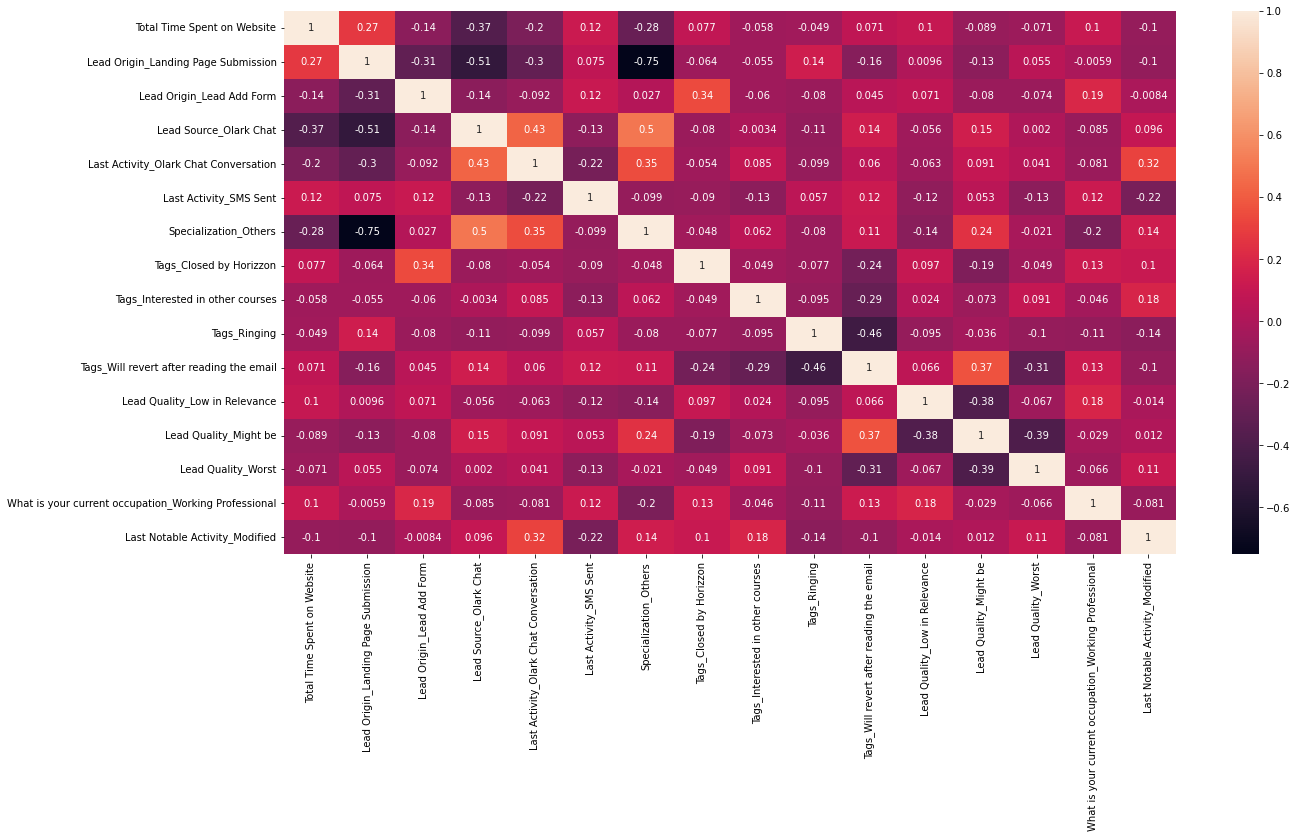

In [104]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe.corr(),annot = True)

* All p-values are very close to zero.
* VIFs for all features are very low. There is hardly any multicollinearity present.

Hence, we can select model 5 as the final model.

#### Making Predictions on the Train Set

In [105]:
# Getting the Predicted values on the train set
y_train_pred = lr_5.predict(X_train_rfe_5)
y_train_pred[:10]

1871    0.026086
6795    0.143740
3516    0.003301
8105    0.066845
3934    0.094416
4844    0.992976
3297    0.005851
8071    0.999967
987     0.197278
7423    0.952010
dtype: float64

In [106]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0260861 , 0.14374019, 0.00330071, 0.06684539, 0.09441587,
       0.9929764 , 0.00585094, 0.99996651, 0.19727846, 0.95200966])

In [107]:
#Creating a dataframe with the actual and the predicted probabilities

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,1871,0,0.026086
1,6795,0,0.143740
2,3516,0,0.003301
3,8105,0,0.066845
4,3934,0,0.094416


In [108]:
#Creating new column 'predicted' with 1 if Probobility > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted
0,1871,0,0.026086,0
1,6795,0,0.143740,0
2,3516,0,0.003301,0
3,8105,0,0.066845,0
4,3934,0,0.094416,0


In [109]:
# Confusion matrix for the target column : `converted `

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3712  290]
 [ 439 2027]]


In [110]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.887291280148423


In [111]:
#classification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4002
           1       0.87      0.82      0.85      2466

    accuracy                           0.89      6468
   macro avg       0.88      0.87      0.88      6468
weighted avg       0.89      0.89      0.89      6468



Accuracy rate is around 89% which is good. 
However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics.

In [112]:
vifcalculate(X_train_rfe)

,Features,VIF
12,Lead Quality_Might be,5.23
10,Tags_Will revert after reading the email,5.04
1,Lead Origin_Landing Page Submission,3.97
6,Specialization_Others,3.47
0,Total Time Spent on Website,2.18
3,Lead Source_Olark Chat,2.13
15,Last Notable Activity_Modified,1.88
9,Tags_Ringing,1.69
5,Last Activity_SMS Sent,1.67
2,Lead Origin_Lead Add Form,1.58


All variables have a good value of VIF. 

#### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8219789132197891

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.927536231884058

In [116]:
# Calculate false postive rate - predicting non conversion when leads have converted
print(FP/ float(TN+FP))

0.07246376811594203


In [117]:
# positive predictive value 
print (TP / float(TP+FP))

0.8748381527837721


In [118]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8942423512406649


### Plotting the ROC Curve
An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

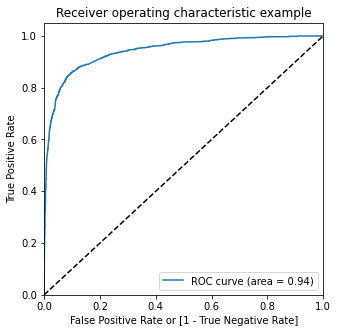

In [121]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point
Optimal cut off probability is the probability where we get balanced sensitivity and specificity.

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1871,0,0.026086,0,1,0,0,0,0,0,0,0,0,0
1,6795,0,0.143740,0,1,1,0,0,0,0,0,0,0,0
2,3516,0,0.003301,0,1,0,0,0,0,0,0,0,0,0
3,8105,0,0.066845,0,1,0,0,0,0,0,0,0,0,0
4,3934,0,0.094416,0,1,0,0,0,0,0,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.744125  0.960665  0.610695
0.2   0.2  0.819109  0.932279  0.749375
0.3   0.3  0.871985  0.884023  0.864568
0.4   0.4  0.885127  0.858475  0.901549
0.5   0.5  0.887291  0.821979  0.927536
0.6   0.6  0.884354  0.780211  0.948526
0.7   0.7  0.866265  0.700324  0.968516
0.8   0.8  0.847557  0.630170  0.981509
0.9   0.9  0.805968  0.504055  0.992004


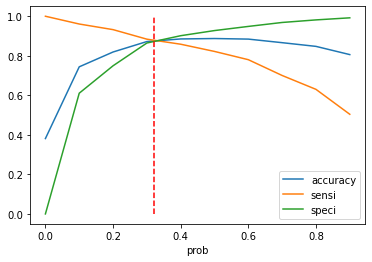

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.32,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

In [125]:
# Let us make the final prediction using 0.32 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1871,0,0.026086,0,1,0,0,0,0,0,0,0,0,0,0
1,6795,0,0.143740,0,1,1,0,0,0,0,0,0,0,0,0
2,3516,0,0.003301,0,1,0,0,0,0,0,0,0,0,0,0
3,8105,0,0.066845,0,1,0,0,0,0,0,0,0,0,0,0
4,3934,0,0.094416,0,1,0,0,0,0,0,0,0,0,0,0


In [126]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1871,0,0.026086,0,1,0,0,0,0,0,0,0,0,0,0,3
1,6795,0,0.143740,0,1,1,0,0,0,0,0,0,0,0,0,14
2,3516,0,0.003301,0,1,0,0,0,0,0,0,0,0,0,0,0
3,8105,0,0.066845,0,1,0,0,0,0,0,0,0,0,0,0,7
4,3934,0,0.094416,0,1,0,0,0,0,0,0,0,0,0,0,9
5,4844,1,0.992976,1,1,1,1,1,1,1,1,1,1,1,1,99
6,3297,0,0.005851,0,1,0,0,0,0,0,0,0,0,0,0,1
7,8071,1,0.999967,1,1,1,1,1,1,1,1,1,1,1,1,100
8,987,0,0.197278,0,1,1,0,0,0,0,0,0,0,0,0,20
9,7423,1,0.952010,1,1,1,1,1,1,1,1,1,1,1,1,95


In [127]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2171
0     295
Name: final_predicted, dtype: int64

In [128]:
# check the precentage of final_predicted conversions

2127/float(2127+339)

0.8625304136253041

Hence we can see that the final prediction of conversions have a target of 86% conversion as per the X Educations CEO's requirement. Hence this is a good model.

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [129]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8761595547309833

In [130]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3496,  506],
       [ 295, 2171]], dtype=int64)

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8803730738037308

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.8735632183908046

In [134]:
# Calculate false postive rate - predicting conversions when leads has not converted
print(FP/ float(TN+FP))

0.12643678160919541


In [135]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8109824430332462


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9221841202848853


##### Inference:
The model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

* Accuracy : 87.61%
* Sensitivity : 88.03%
* Specificity : 87.35%
* False Positive Rate : 12.64%
* Positive Predictive Value : 81.09%
* Negative Predictive Values : 92.21%

##### Metrics - Precision and Recall

In [137]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3712,  290],
       [ 439, 2027]], dtype=int64)

In [138]:
from sklearn.metrics import precision_score, recall_score

# precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8748381527837721

In [139]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8219789132197891

##### Precision and recall tradeoff

In [140]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

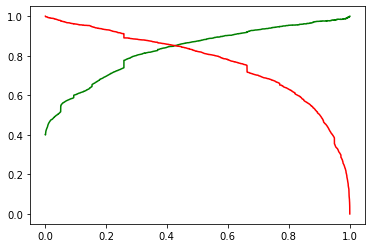

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [142]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4269,0.485978,0.0,0.8,0.448735,1.000000,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2376,0.706211,0.0,0.0,0.000000,0.000000,0.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
7766,0.132219,0.0,0.5,0.026187,0.833333,0.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9199,0.004262,0.0,0.0,0.000000,0.000000,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4359,0.472749,0.0,0.0,0.000000,0.000000,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [143]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [144]:
# Making predictions
y_test_pred = lr_5.predict(X_test_new)

In [145]:
y_test_pred[:10]

4269    0.873347
2376    0.995930
7766    0.797968
9199    0.035974
4359    0.990207
9186    0.923548
1631    0.934825
8963    0.222267
8007    0.081342
5324    0.832759
dtype: float64

In [146]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
4269,0.873347
2376,0.995930
7766,0.797968
9199,0.035974
4359,0.990207


In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting LeadId to index
y_test_df['LeadId'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadId,0
0,1,4269,0.873347
1,1,2376,0.995930
2,1,7766,0.797968
3,0,9199,0.035974
4,1,4359,0.990207


In [149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [150]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,4269,1,0.873347
1,2376,1,0.995930
2,7766,1,0.797968
3,9199,0,0.035974
4,4359,1,0.990207


In [151]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.32%
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.32 else 0)
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,4269,1,0.873347,1
1,2376,1,0.995930,1
2,7766,1,0.797968,1
3,9199,0,0.035974,0
4,4359,1,0.990207,1


In [152]:
# Now let us calculate the lead score
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,4269,1,0.873347,1,87
1,2376,1,0.995930,1,100
2,7766,1,0.797968,1,80
3,9199,0,0.035974,0,4
4,4359,1,0.990207,1,99
5,9186,1,0.923548,1,92
6,1631,1,0.934825,1,93
7,8963,1,0.222267,0,22
8,8007,0,0.081342,0,8
9,5324,1,0.832759,1,83


In [153]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    965
0    130
Name: final_predicted, dtype: int64

In [154]:
# check the precentage of final_predicted conversions on test data
965/float(965+130)

0.8812785388127854

* We can see that the final prediction of conversions have a target rate of 88% 

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [155]:
# Let's check the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8766233766233766

In [156]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1465,  212],
       [ 130,  965]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8812785388127854

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.8735837805605248

##### F1,Precision and Recall metrics for the test set

In [160]:
# precision
Precision = precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
print('Precision ',Precision)

# recall
Recall = recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
print('Recall ',Recall)

Precision  0.8198810535259133
Recall  0.8812785388127854


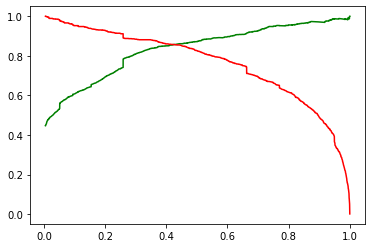

In [161]:
#precision or recall tradeoff
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [162]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8494718309859155

##### Classification Report

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1677
           1       0.82      0.88      0.85      1095

    accuracy                           0.88      2772
   macro avg       0.87      0.88      0.87      2772
weighted avg       0.88      0.88      0.88      2772



##### Inference:
After running the model on the Test Data these are the figures we obtain:

* Accuracy : 87.68%
* Sensitivity : 88.12%
* Specificity : 87.35%

In [164]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = lr_5.params[1:]
new_params

Total Time Spent on Website                             4.42
Lead Origin_Landing Page Submission                    -0.95
Lead Origin_Lead Add Form                               2.99
Lead Source_Olark Chat                                  0.73
Last Activity_Olark Chat Conversation                  -0.65
Last Activity_SMS Sent                                  1.73
Specialization_Others                                  -0.84
Tags_Closed by Horizzon                                 6.98
Tags_Interested in other courses                       -2.25
Tags_Ringing                                           -3.03
Tags_Will revert after reading the email                1.83
Lead Quality_Low in Relevance                           1.11
Lead Quality_Might be                                  -1.45
Lead Quality_Worst                                     -2.55
What is your current occupation_Working Professional    2.19
Last Notable Activity_Modified                         -1.21
dtype: float64

In [165]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                             63.25
Lead Origin_Landing Page Submission                    -13.65
Lead Origin_Lead Add Form                               42.75
Lead Source_Olark Chat                                  10.41
Last Activity_Olark Chat Conversation                   -9.31
Last Activity_SMS Sent                                  24.72
Specialization_Others                                  -12.07
Tags_Closed by Horizzon                                100.00
Tags_Interested in other courses                       -32.15
Tags_Ringing                                           -43.45
Tags_Will revert after reading the email                26.21
Lead Quality_Low in Relevance                           15.92
Lead Quality_Might be                                  -20.81
Lead Quality_Worst                                     -36.56
What is your current occupation_Working Professional    31.40
Last Notable Activity_Modified                         -17.32
dtype: f

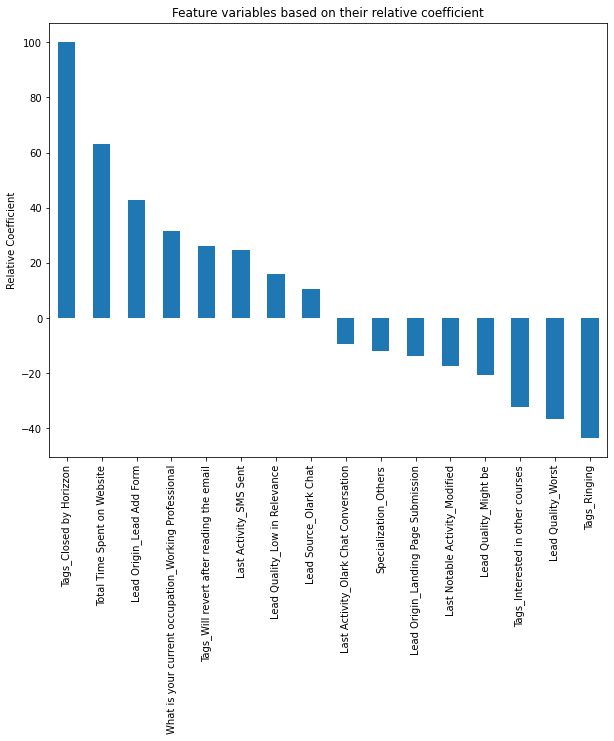

In [166]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (10,8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [167]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
7,Tags_Closed by Horizzon,100.00
0,Total Time Spent on Website,63.25
2,Lead Origin_Lead Add Form,42.75


In [168]:
# Selecting Top 3 features that needs improvement to convert a lead 
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=True).head(3)

,index,0
9,Tags_Ringing,-43.45
13,Lead Quality_Worst,-36.56
8,Tags_Interested in other courses,-32.15


### Conclusion:

* While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
* Accuracy, Sensitivity and Specificity values of test set are around 88%, 88% and 87% which are approximately closer to the respective values calculated using trained set.
* Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 86% <br>
Hence overall this model seems to be good.

##### Top 3 variables that contributing to convert a lead are:
1. Tags_Closed by Horizzon
2. Total Time Spent on Website
3. Lead Origin_Lead Add Form

##### Top 3 variables that need improvement to convert a lead are:
1. Tags_Ringing
2. Lead Quality_Worst
3. Tags_Interested in other courses